# Data Wrangling in Python

### Case Study - Analysis of NYC 311 Service Requests

In this analysis, we will look at the 311 Service Requests dataset published by New York City. 

#### What are 311 Service Requests?

311 Service Requests are requests made by residents for city services such as noise complains, or issues with water and utilities. Each request is recorded along with several pieces of associated information such as the type of request and where in the city the request originated.

#### Dataset
The current dataset includes more than 17 million rows of data and contains data from 2010 to the present.

The full dataset is updated daily and can be accessed [on the NYC Open Data Wesbite](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9).

#### Analysis

We will look into a small subset of this data: all complaints for the month of April 2018. 

The question we will try to answer with the analysis of the 311 NYC data is as follows:

> What part of the city has the most noise complaints on Sunday?

[comment]: <> (some materials in this notebook are based from Julia Evans https://jvns.ca/blog/2013/12/22/cooking-with-pandas/)

## Part 0 - Importing Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler

## Part 1 - Reading the data
For this demonstration, download the data from the link. 

Once we have read the data, it's a good idea to check the `head`, `shape`, and `info` of the result to make sure all rows and columns have been captured.
- `head` or `tail` will show the first or last few records of your DataFrame
- `shape` will show you the number of rows and columns
- `info` will show you the columns and their respective data types

**Note:** 
- Make sure that the file is in the correct folder or update the path in the read_csv() function to include the correct path to the file. 
- The `pd.read_csv` command has [many options](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) that allow you to control how the file is read. For example, some files will have headers while others won't. Pandas will try to detect these things automatically, but in some cases you may need to play around wiht the options to get it just right.

In [5]:
df = pd.read_excel('C_Online_Retail.xlsx')

In [39]:
df.head()

,UnitPrice,Quantity
0,2.55,6
1,3.39,6
2,2.75,8
3,3.39,6
4,3.39,6


In [31]:
df = df[['UnitPrice', 'Quantity']]

In [46]:
df['UnitPrice'].sort_values()

299984   -11062.06
299983   -11062.06
40984         0.00
52217         0.00
52262         0.00
            ...   
16356     13541.33
43703     16453.71
43702     16888.02
524602    17836.46
222681    38970.00
Name: UnitPrice, Length: 541909, dtype: float64

In [25]:
df['UnitPrice'].value_counts()

1.25       50496
1.65       38181
0.85       28497
2.95       27768
0.42       24533
           ...  
4575.64        1
125.96         1
147.13         1
3060.60        1
244.51         1
Name: UnitPrice, Length: 1630, dtype: int64

In [32]:
sorted(df.groupby('UnitPrice')['Quantity'].sum())

[-134354,
 -9720,
 -720,
 -240,
 -200,
 -143,
 -96,
 -69,
 -60,
 -49,
 -48,
 -36,
 -25,
 -24,
 -12,
 -10,
 -8,
 -5,
 -4,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,

In [ ]:
#Use only stockCode and Quantity

In [ ]:
#Use quantity and price

### Clustering

In [ ]:
# Items that are bought more

In [33]:
df.shape

(541909, 2)

In [37]:
df.values

array([[2.55, 6.  ],
       [3.39, 6.  ],
       [2.75, 8.  ],
       ...,
       [4.15, 4.  ],
       [4.15, 4.  ],
       [4.95, 3.  ]])

In [ ]:
plt.plot(df.index, df[0], c='orange')
plt.title('random points')
plt.ylabel('Value')
plt.xlabel('Index')

In [35]:
X = df.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [49]:
def kmeans(X,k=3,max_iterations=100):
    '''
    X: multidimensional data
    k: number of clusters
    max_iterations: number of repetitions before clusters are established
    
    Steps:
    1. Convert data to numpy aray
    2. Pick indices of k random point without replacement
    3. Find class (P) of each data point using euclidean distance
    4. Stop when max_iteration are reached of P matrix doesn't change
    
    Return:
    np.array: containg class of each data point
    '''
    if isinstance(X, pd.DataFrame):X = X.values
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :]
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    for _ in range(max_iterations):
        centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(k)])
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):break
        P = tmp
    return P

In [50]:
P = kmeans(X)

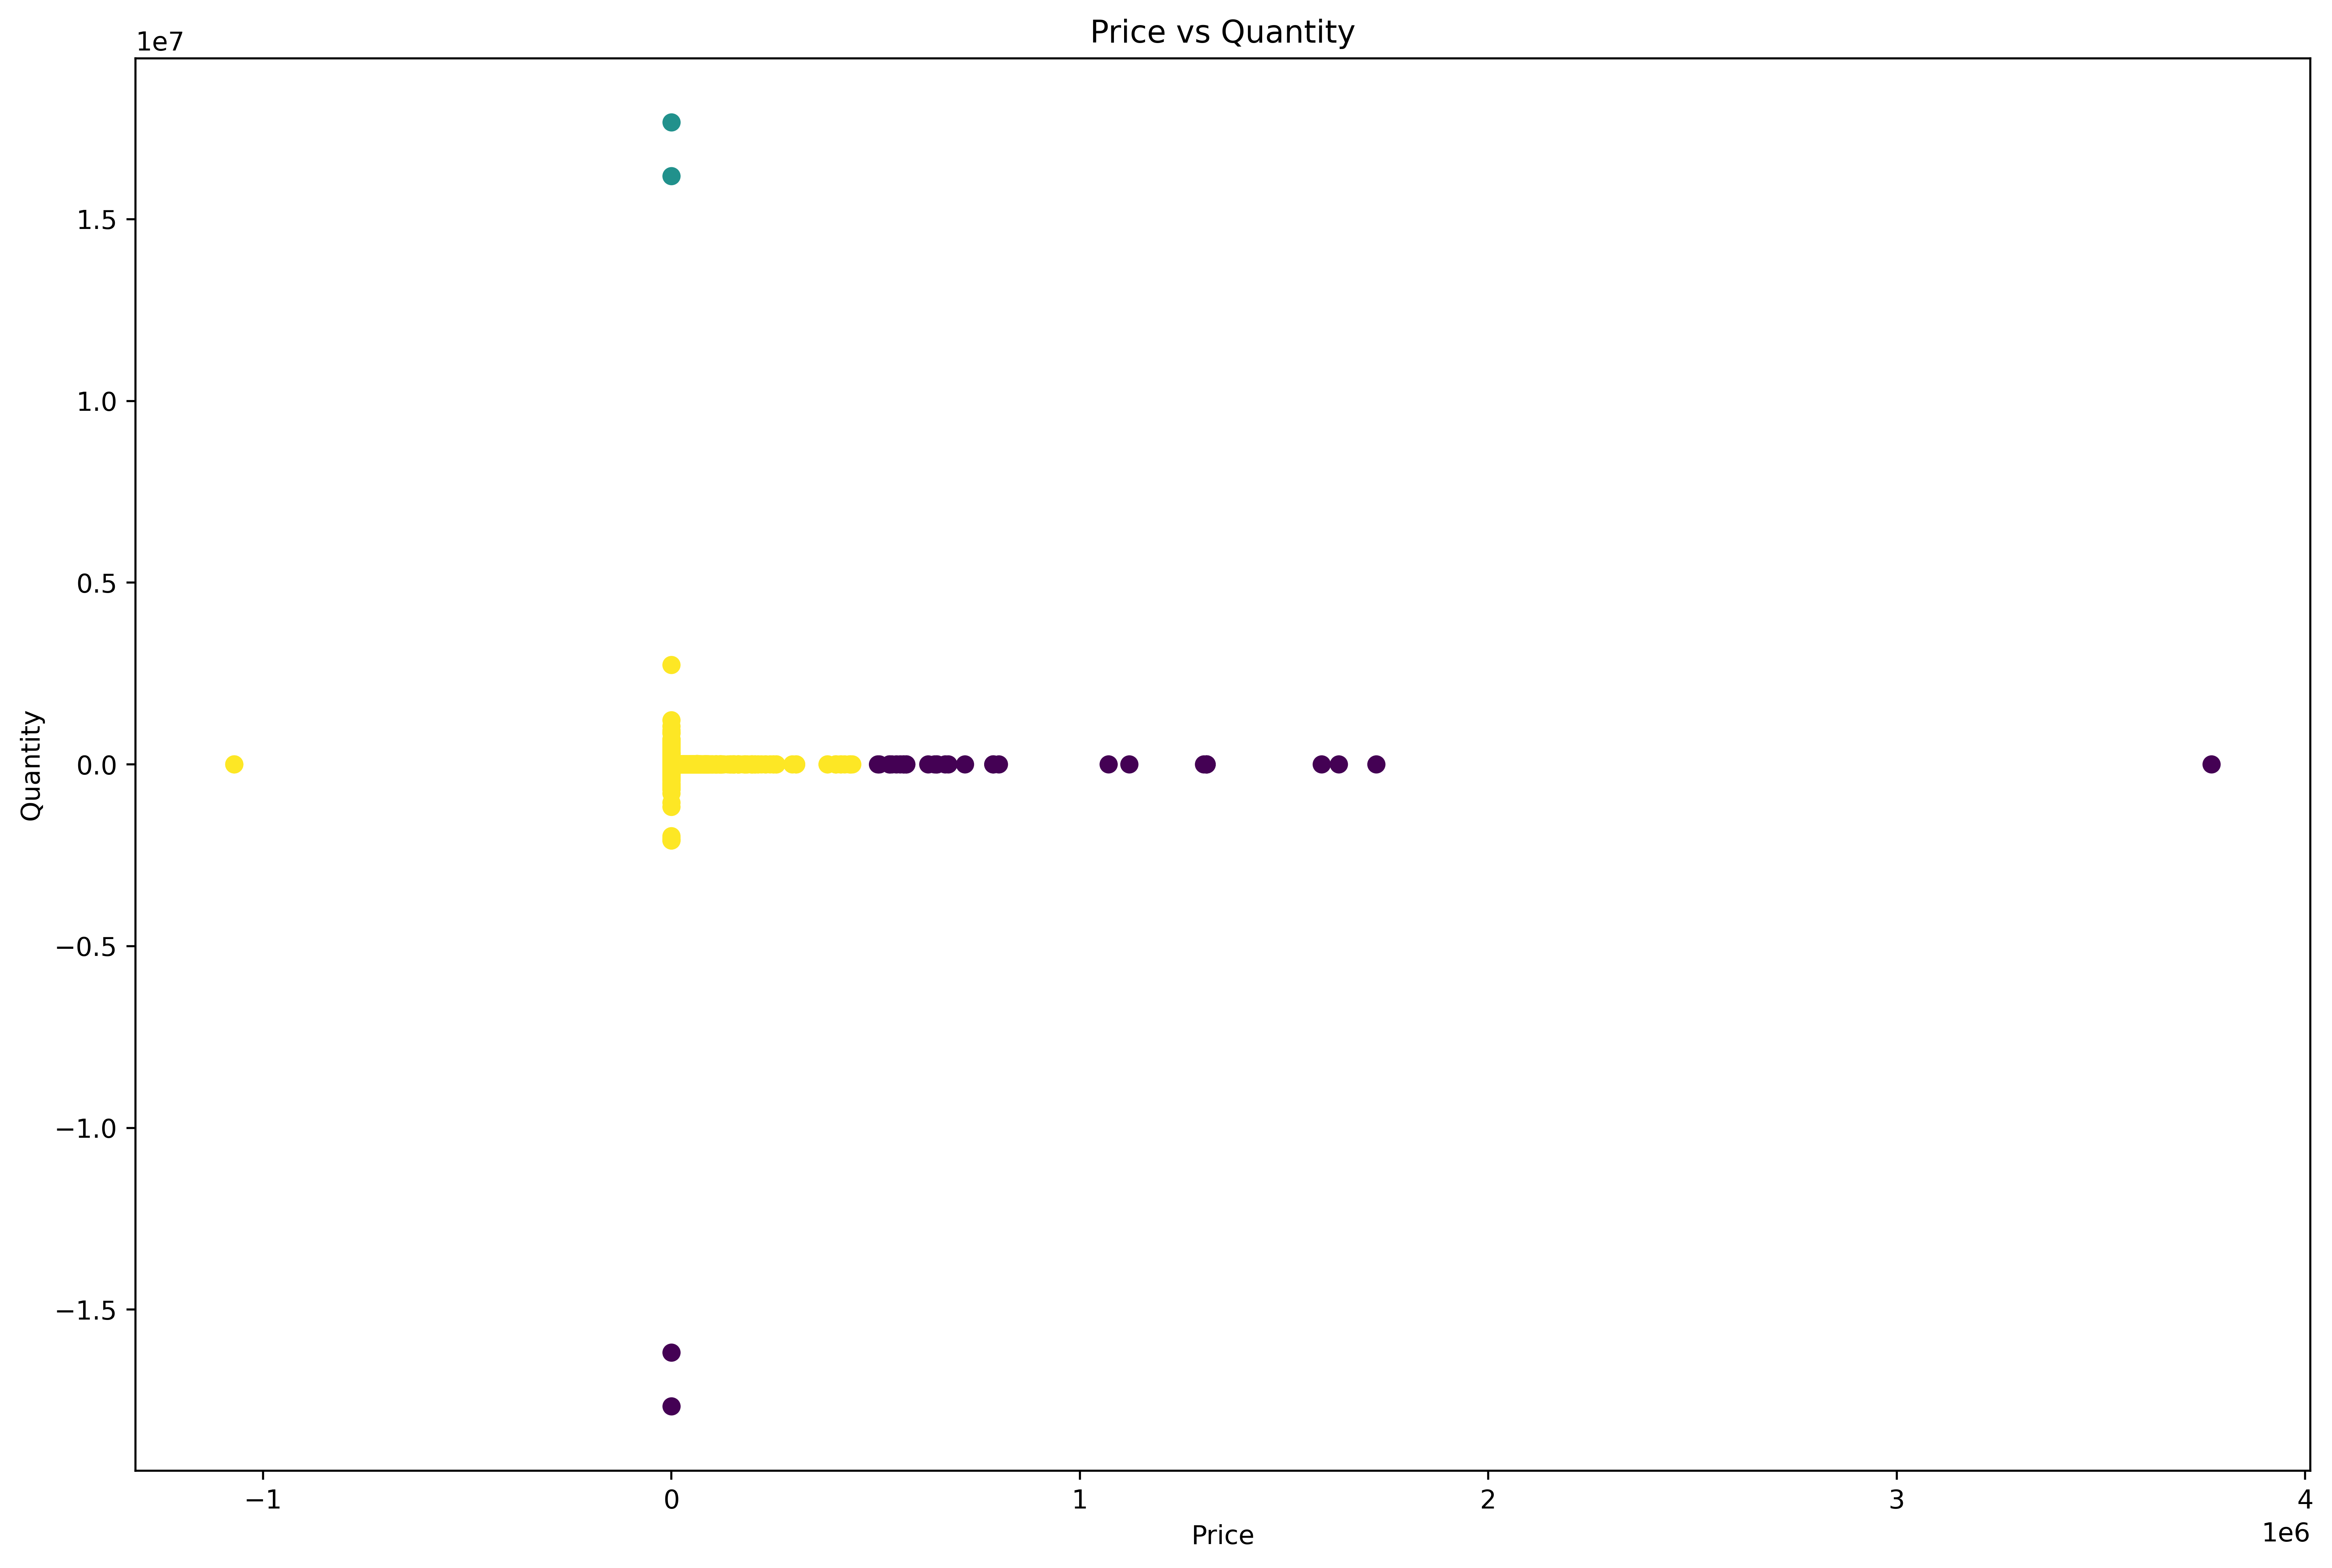

In [47]:
X = sc.inverse_transform(X)
plt.figure(figsize=(15,10), dpi=500)
plt.scatter(X[:,0], X[:,1], c=P)
plt.title('Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

### KMeans Validation

<function matplotlib.pyplot.show(*args, **kw)>

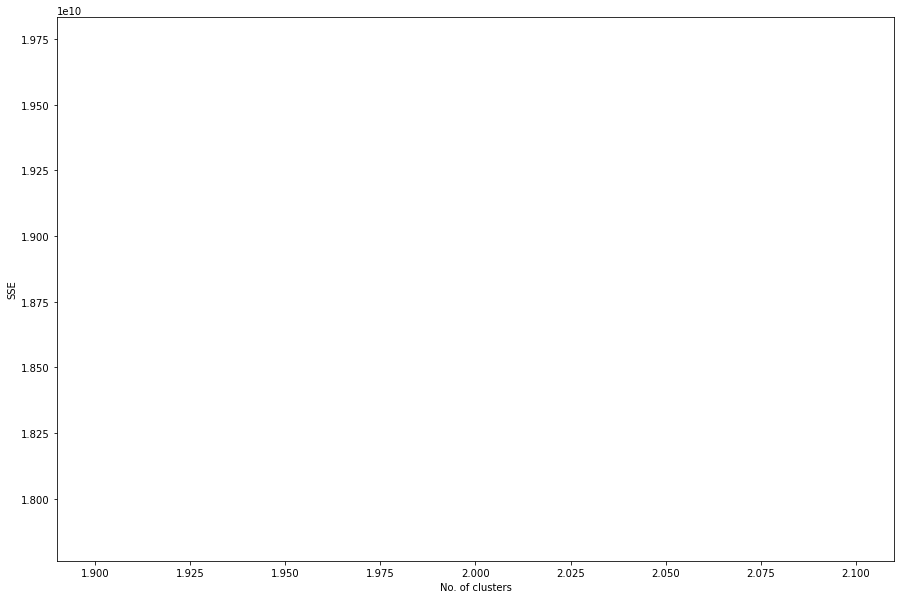

In [51]:
plt.figure(figsize=(15,10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.show

In [52]:
!pip install kneed

In [55]:
from kneed import *

NameError: name 'kl' is not defined

In [58]:
kl = KneeLocator(range(2,10), list(sse.values()), curve='convex', direction="decreasing")

ValueError: x and y arrays must be equal in length along interpolation axis.

In [57]:
kl.elbow

NameError: name 'kl' is not defined

In [44]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [45]:
sse,db,slc = {}, {}, {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X,clusters)
    slc[k] = silhouette_score(X,clusters)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.show

## Part 2 - Investigating the data

Now that we know that all our data has been stored in the DataFrame, lets see what columns we want to use, what data is in there, and figure out if we need to clean up the data at all.

The columns we are interested in are:
1. **Created Date** - to determine which day of the week the complaint was filed
2. **Borough** - to determine which part of the city the complaint originated from
3. **Complaint Type** - to determine the category of complaint

Lets take a look at these columns and see what we find there.
- functions like `unique()` and `value_counts()` are useful to investigate columns with string or date values
- functions like `describe()` are useful to investigate columns with numerical values and check for outliers

Some key observations include:
1. There appear to be many different complaint types related to noise like 'Noise - Residential', 'Noise', etc.
    - We will have to group these complaints to get an accurate picture of the overall number of noise complaints
2. There are some complaints that were logged to an 'Unspecified' borough, but the total number of records is low (~4,000 out of total ~200,000)
    - Since we will be grouping our data based on borough we can keep these records
3. The data type of the 'Created Date' is currently a string object, which should be converted to a datetime object to allow us to easily filter on any day of the week, month, etc.

Based on our observations, the cleanup we can do on these columns includes:
1. Redefine 'Created Date' data type for filtering on days of the week (we want the most popular complaint on Sunday).
2. Add a new column *'is_noise'* based on *'Complaint Type'* to capture similar noise-related complaints.

## Part 3 - Cleaning the data

#### 1. Redefine 'Created Date' data type for filtering on days of the week (we want the most popular complaint on Sunday)
- By default, pandas read the 'Created Date' column as a string, so we will tell it that this is a date using the `to_datetime` method.
- We can double-check to make sure it worked by using the `info()` to check for the column's data type

#### 2. Add a new column *'is_noise'* based on *'Complaint Type'* to capture similar noise-related complaints like 'Noise' and 'Noise - Residential'
- Just by looking at the top 10 complaint types using `value_counts`, we notice the data contains redundancy like 'Noise' and 'Noise - Residential', which is surprisingly common. 
- Grouping the data before cleaning it up will skew our results, so we need to clean it up first.
- We will clean this up by identifying all complaints where the type contains the word 'noise' using the `str.contains` method, and creating a new column to indicate whether the complaint is noise-related *'is_noise'*

## Part 4 - Answering the question
Remember, our question is as follows:
> What part of the city has the most noise complaints on Sunday?

Now that our data is clean, all we have to do is:
1. Filter on the noise complaints using our new column 'is_noise'
2. Filter on the days of the week using the 'Created Date' column, which is super easy now that it's defined as a date
    - `dt.dayofweek` returns a different number for each day of the week. Sunday is number 6 as per the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html#pandas.Series.dt.dayofweek).
3. Group the data by neighbourhood using the 'Borough' column, and sort to show the neighbourhoods at the top of the list.

> Once we do this, it becomes clear that Manhattan has the most noise complaints on Sundays, followed closely by Brooklyn.

## Part 5 - Making clean data available to others
Now that we have cleaned our data, and added a new column, we can write it out to a file for future analysis.